# Data Mining / Prospecção de Dados

## Docente: Sara C. Madeira, 2019/20
## Aluno: Pedro Cotovio

# Project 3 - Classification/Regression

## Part2 - Model Training & Testing

## 1. Load Dataset

Import required libraries, and import datasets previosly defined in `1_PD_PP_Project3.ipynb`.

In [1]:
# Imports libraries
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np

# Import local modules

from classification import *

#IPython Configs

%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

# Get data_path
path = get_path()

Path to Data: C:\Users\peped\OneDrive - Universidade de Lisboa\Ciencias de Dados\PD\PD_3_Classification\dataset


In [2]:
# Import dataframes
df_class = pd.read_csv(os.path.join(path,"balanced_df.csv"), index_col=0)
df = pd.read_csv(os.path.join(path,"normal_df.csv"), index_col=0)
# Shape as features/target arrays
X_class = df_class.loc[:, df_class.columns != 'target'].values
y_class = df_class['target'].values
X = df.loc[:, df.columns != 'target'].values
y = df['target'].values

## 2. Fitting Simple Models

At this stage models are trained.

To be able to train and test, a great many number of models, a pipeline was implemented, that can:

* Find best parameters for every model using grid search, and cross-validation.
* Receive has input both regressor models and classifiers.
* Compare complete model to a OneVSRest set of models (when possible).
* Save final models to .pkl file (trained with full dataset).

This pipeline allows fast exploration of many different models, to access which best adapt to a dataset (Enabling parallelization, set n_jobs to number of cores to use, will increase speed considerably). Using this pipeline, it was possible to explore many sklearn models, increasing certainty in the top models selected.

In [3]:
# Define Data

X_shape = {'classifier': X_class, 'regressor': X}
y_shape = {'classifier': y_class, 'regressor': y}

# Define Models and parameters to search

params = [
    {
        "model": 'MLPClassifier',
        "module": 'neural_network',
        "param_grid": {'hidden_layer_sizes': [(100), (100,50,15)], 'learning_rate': ('constant', 'adaptive'), "max_iter": [400]}
    },
    {
        "model": 'MLPRegressor',
        "module": 'neural_network',
        "param_grid": {'hidden_layer_sizes': [(100), (100,50,15)], 'learning_rate': ('constant', 'adaptive'), "max_iter": [400]}
    },
    {
        "model": 'SVC',
        "module": 'svm',
        "param_grid": {'C': [1, 10, 100, 1000], 'kernel': ('linear', 'rbf')}
    },
    {
        "model": 'SVR',
        "module": 'svm',
        "param_grid": {'C': [1, 10, 100, 1000], 'kernel': ('linear', 'rbf')}
    },
    {
        "model": 'KNeighborsClassifier',
        "module": 'neighbors',
        "param_grid": {'n_neighbors': [3, 5, 7], 'weights': ('uniform', 'distance')}
    },
    {
        "model": 'KNeighborsRegressor',
        "module": 'neighbors',
        "param_grid": {'n_neighbors': [3, 5, 7], 'weights': ('uniform', 'distance')}
    },
    {
        "model": 'GaussianNB',
        "module": 'naive_bayes',
        "param_grid": {'var_smoothing': [1e-9, 1e-7]}
    },
    {
        "model": 'MultinomialNB',
        "module": 'naive_bayes',
        "param_grid": {'alpha': [0, 0.5, 1]}
    },
        {
        "model": 'ComplementNB',
        "module": 'naive_bayes',
        "param_grid": {'alpha': [0, 0.5, 1], 'norm': (True, False)}
    },
    {
        "model": 'DecisionTreeClassifier',
        "module": 'tree',
        "param_grid": {'criterion': ('gini', 'entropy'), 'max_depth': [None, 10, 20, 30, 40], 
                       'min_samples_leaf': [2, 5, 10]}
    },
    {
        "model": 'DecisionTreeRegressor',
        "module": 'tree',
        "param_grid": {'criterion': ('mse', 'friedman_mse', 'mae'), 'max_depth': [None, 10, 20, 30, 40], 
                       'min_samples_leaf': [2, 5, 10]}
    },
    {
        "model": 'HuberRegressor',
        "module": 'linear_model',
        "param_grid": {'epsilon': [1.15, 1.35, 1.45], 'max_iter': [100, 200]}
    },
    {
        "model": 'LinearRegression',
        "module": 'linear_model',
        "param_grid": {'normalize': (True, False)}
    },
    {
        "model": 'LogisticRegression',
        "module": 'linear_model',
        "param_grid": {'penalty': ('l1', 'l2', 'elasticnet'), 'C': [1.0, 10.0, 100.0]}
    },
    {
        "model": 'RidgeClassifier',
        "module": 'linear_model',
        "param_grid": {'normalize': (True, False), 'alpha': [1.0, 10.0, 100.0]}
    },
    {
        "model": 'Ridge',
        "module": 'linear_model',
        "param_grid": {'normalize': (True, False), 'alpha': [1.0, 10.0, 100.0]}
    },
    {
        "model": 'BayesianRidge',
        "module": 'linear_model',
        "param_grid": {'normalize': (True, False), 'n_iter': [300, 400, 500]}
    }
]

# Fit Models

grid_search = model_search(X_shape, y_shape, params, n_jobs=-1)
grid_search.df.sort_values(['Score', 'OneVSRest', 'Type'], ascending=False)

# If already Fitted once dataset can be loaded without training
#grid_search = model_search(train=False)
#grid_search.df.sort_values(['Score', 'OneVSRest', 'Type'], ascending=False)

Classifiers: 100%|█████████████████████████████████████████████████████████████████████| 17/17 [02:36<00:00,  9.22s/it]

All Models Trained


,Model,Type,Score,OneVSRest,Parameters,File
0,MLPClassifier,classifier,0.935030,0.944869,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",MLPClassifier.pkl
4,KNeighborsClassifier,classifier,0.933052,0.933052,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",KNeighborsClassifier.pkl
2,SVC,classifier,0.932078,0.930440,"{'C': 1000, 'break_ties': False, 'cache_size':...",SVC.pkl
9,DecisionTreeClassifier,classifier,0.876942,0.904504,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",DecisionTreeClassifier.pkl
13,LogisticRegression,classifier,0.809295,0.797482,"{'C': 100.0, 'class_weight': None, 'dual': Fal...",LogisticRegression.pkl
6,GaussianNB,classifier,0.734493,0.736140,"{'priors': None, 'var_smoothing': 1e-07}",GaussianNB.pkl
7,MultinomialNB,classifier,0.712145,0.721347,"{'alpha': 0, 'class_prior': None, 'fit_prior':...",MultinomialNB.pkl
14,RidgeClassifier,classifier,0.696731,0.696731,"{'alpha': 1.0, 'class_weight': None, 'copy_X':...",RidgeClassifier.pkl
8,ComplementNB,classifier,0.664571,0.720690,"{'alpha': 0, 'class_prior': None, 'fit_prior':...",ComplementNB.pkl
5,KNeighborsRegressor,regressor,0.593329,NaN,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",KNeighborsRegressor.pkl


Has expected, the classification problem obtained results substantially better than the regression problem.

In the classification problem, an almost perfect score is obtained using the Multi-layer perceptron with a OneVsRest approach. Both KNN, and SVM also scored very high, and will be considered in the top 3 classifiers.

In the regression problem, the scores were lower. Having a different scoring metric ($R^2$) and a more difficult problem, are two major contributions to these score results.  
The KNN regressor obtains the best results, showing some consistency, with Ridge Regression and simple Linear Regression also performing well. Unfortunately, Huber Regression, did not perform as well as expected, this robust regressor, was expected to handle better a right skewed target, with many outliers.

## 3. Analysing Top Models

In this part the top 3 best classifiers/regressors will be analysed more thoroughly.

To do this analysis, was implemented a class that enable the construction of advanced metrics, for either classifiers or regressors. 
In case more than one model is used as input the algorithm uses a voting technique to make predictions, in this case all models need to belong to the same model type (classifier/regressor).

## Simple Classifiers

Top 3

1. Multi-Layer Perceptron
2. K Nearest Neighbours
3. Support Vector Machine

Used Metrics:

* Accuracy
* Precision
* Recall
* F1-score
* Normalized confusion matrix

### MLP

<Figure size 1296x576 with 0 Axes>

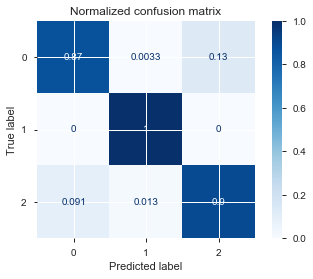

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       306
           1       0.98      1.00      0.99       291
           2       0.88      0.90      0.89       318

    accuracy                           0.92       915
   macro avg       0.92      0.92      0.92       915
weighted avg       0.92      0.92      0.92       915



In [4]:
i = 0
params = {"model": grid_search.df.Model[i], "module": 'neural_network', "hp": grid_search.df.Parameters[i]}

mlp = analyse_model(params, ovr=True)
metrics = mlp.fit_test(X_class, y_class)
print(metrics)

### KNN

<Figure size 1296x576 with 0 Axes>

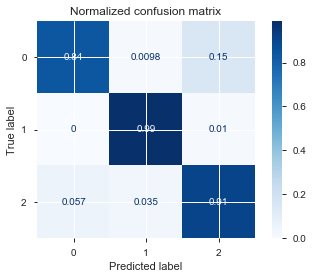

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       306
           1       0.95      0.99      0.97       291
           2       0.86      0.91      0.88       318

    accuracy                           0.91       915
   macro avg       0.91      0.91      0.91       915
weighted avg       0.91      0.91      0.91       915



In [5]:
i = 4
params = {"model": grid_search.df.Model[i], "module": 'neighbors', "hp": grid_search.df.Parameters[i]}

knn = analyse_model(params, ovr=False)
metrics = knn.fit_test(X_class, y_class)
print(metrics)

### SVM

<Figure size 1296x576 with 0 Axes>

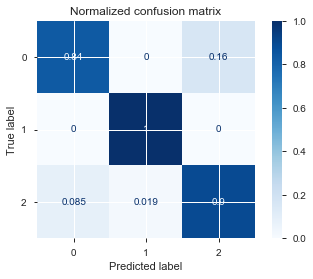

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       306
           1       0.98      1.00      0.99       291
           2       0.85      0.90      0.87       318

    accuracy                           0.91       915
   macro avg       0.91      0.91      0.91       915
weighted avg       0.91      0.91      0.91       915



In [6]:
i = 2
params = {"model": grid_search.df.Model[i], "module": 'svm', "hp": grid_search.df.Parameters[i]}

knn = analyse_model(params, ovr=True)
metrics = knn.fit_test(X_class, y_class)
print(metrics)

### Conclusions

All 3 top classifiers have almost perfect scores all around, with no apparent overfitting. The models saved (fitted with the full dataset), have sufficient quality to be used in a production environment.

## Simple Regressors

Top 3

* K Nearest Neighbours (Regressor)
* Ridge Regression
* Linear Regression

Used Metrics:

* Mean Absolute Error
* Median Absolute Error
* Mean Squared Error
* Mean Squared Log Error
* Mean Tweedie Deviance
* $R^2$
* Explained Variance

### KNN

In [7]:
i = 5
params = {"model": grid_search.df.Model[i], "module": 'neighbors', "hp": grid_search.df.Parameters[i]}

knn = analyse_model(params, ovr=False)
knn.fit_test(X_class, y_class)

,Metric,Score
0,explained_variance_score,0.633469
1,mean_absolute_error,0.235975
2,mean_squared_error,0.250361
3,mean_squared_log_error,0.080062
4,mean_tweedie_deviance,0.250361
5,median_absolute_error,0.000000
6,r2_score,0.632791


### Ridge

In [8]:
i = 15
params = {"model": grid_search.df.Model[i], "module": 'linear_model', "hp": grid_search.df.Parameters[i]}

knn = analyse_model(params, ovr=False)
knn.fit_test(X_class, y_class)

,Metric,Score
0,explained_variance_score,0.304481
1,mean_absolute_error,0.589197
2,mean_squared_error,0.474382
3,mean_tweedie_deviance,0.474382
4,median_absolute_error,0.566420
5,r2_score,0.304216


### Linear Regression

In [9]:
i = 12
params = {"model": grid_search.df.Model[i], "module": 'linear_model', "hp": grid_search.df.Parameters[i]}

knn = analyse_model(params, ovr=False)
knn.fit_test(X_class, y_class)

,Metric,Score
0,explained_variance_score,0.305124
1,mean_absolute_error,0.587399
2,mean_squared_error,0.473950
3,mean_tweedie_deviance,0.473950
4,median_absolute_error,0.569427
5,r2_score,0.304851


### Conclusions

The only regressor that is performing well, all around, is the KNN regressor, this says much about its consistency in its ability to model this dataset. In this case, combining these 3 models would probably decrease the performance of the KNN model. So, another solution will need to be found.

## 4. Ensemble Learning

At this stage a combination of simple classifiers will be tried, to see if performance can be increased.

### Random Forests

Random forests are an ensemble of randomly initialized decision trees and are a very good ensemble technique. They solve some of the inherited decision trees bias, which is the reason they are so popular.

##### Grid Search

The previously defined model_search class will be used to search for the best parameters and return an initial analysis.

In [10]:
# Define Data

X_shape = {'classifier': X_class, 'regressor': X}
y_shape = {'classifier': y_class, 'regressor': y}

# Define Models and parameters to search

params = [
    {
        "model": 'ExtraTreesClassifier',
        "module": 'ensemble',
        "param_grid": {'criterion': ('gini', 'entropy'), 'max_depth': [20, 30, 40], 
                       'min_samples_leaf': [2, 3], 'n_estimators': [10, 100]}
    },
    {
        "model": 'ExtraTreesRegressor',
        "module": 'ensemble',
        "param_grid": {'criterion': ('mse', 'mae'), 'max_depth': [20, 30, 40], 
                       'min_samples_leaf': [2, 3], 'n_estimators': [10, 100]}
    }
]

# Fit Models

rf = model_search(X_shape, y_shape, params, csv='rf.csv')
rf.df

# Already Trained
# grid_search = model_search(train=False, csv='rf.csv')
# grid_search.df

Classifiers: 100%|███████████████████████████████████████████████████████████████████████| 2/2 [00:52<00:00, 26.19s/it]

All Models Trained


,Model,Type,Score,OneVSRest,Parameters,File
0,ExtraTreesClassifier,classifier,0.938953,0.935017,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",ExtraTreesClassifier.pkl
1,ExtraTreesRegressor,regressor,0.637432,NaN,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",ExtraTreesRegressor.pkl


The random forest classifier obtains a good performance, but not sufficient to outperform, simpler classifiers. While the random forest regressor, seems to obtain a very good score, sufficient to outperform most regressors.

##### Classification

<Figure size 1296x576 with 0 Axes>

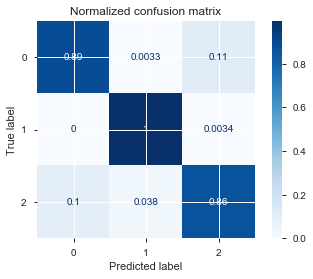

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       306
           1       0.96      1.00      0.98       291
           2       0.89      0.86      0.87       318

    accuracy                           0.91       915
   macro avg       0.91      0.91      0.91       915
weighted avg       0.91      0.91      0.91       915



In [13]:
i = 0
params = {"model": rf.df.Model[i], "module": 'ensemble', "hp": rf.df.Parameters[i]}

extra_trees = analyse_model(params, ovr=False)
metrics = extra_trees.fit_test(X_class, y_class)
print(metrics)

Given the added training time, when comparing, with previous classifiers, this ensemble classifier does not offer a very good solution to this specific problem. Nevertheless, this is a widely recognize ensemble model. Although for this problem training time/score ratio is not the best, and it does not offer a significant improvement on prediction time, unlike MLP's or SVMs, this model offers exploitability. This model makes analysing feature importance very easy, unlike MLP models. Also it is able to handle categorical data very well, which maybe helpful in many situations.

When comparing this model with deep learning models, we also see a significant improvement in training time, although it still has a poor prediction time.

It is normal that this ensemble, would not be the one to achieve best results. It is an ensemble of decision trees, and although they outperform MLPs and SVMs clearly in categorical datasets, or mixture datasets, the way this dataset was encoded brings an advantage to numerical models.

##### Regression

In [22]:
i = 1
params = {"model": rf.df.Model[i], "module": 'ensemble', "hp": rf.df.Parameters[i]}

extra_trees = analyse_model(params, ovr=False)
extra_trees.fit_test(X_class, y_class)

,Metric,Score
0,explained_variance_score,0.632226
1,mean_absolute_error,0.303235
2,mean_squared_error,0.252231
3,mean_squared_log_error,0.075270
4,mean_tweedie_deviance,0.252231
5,median_absolute_error,0.100000
6,r2_score,0.630049


This regression model performs very well in all-round metrics. Achieving similar results to KNN regressor.

### Voting Classifier/Regressor

This technique combines many models, so that the strengths of the group can overcome their individual deficiencies. 

As the name suggests, for classifiers this technique is based on voting. For any given prediction, the class with most votes it is the predicted class. For this reason, it is important to select an impar number of voting models. In case of a *soft* voting system, the probabilities for each class are used instead of the actual prediction, and the most probable class is chosen. This method might seem a better solution, but in truth normally it is not because classifiers are not optimized to predict probabilities but classes. Most times they are not well calibrated, and some do not even generate probabilities, so probabilities need to be generated based on their average predictions. In conclusion *hard* voting techniques, normally obtain better results.

For regressors the predictions are continuous values, so voting is not possible, for these models, the ensemble uses the mean of all models’ predictions. In this context, models added to the ensemble need to be more carefully selected, since a single model can have a big impact on predictions.

##### Classification

<Figure size 1296x576 with 0 Axes>

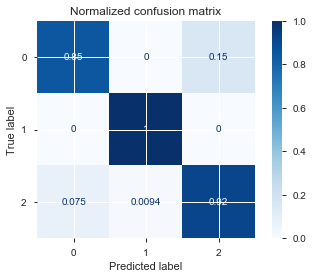

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       306
           1       0.99      1.00      0.99       291
           2       0.86      0.92      0.89       318

    accuracy                           0.92       915
   macro avg       0.92      0.92      0.92       915
weighted avg       0.92      0.92      0.92       915



In [27]:
params = [{"model": grid_search.df.Model[0], "module": 'neural_network', "hp": grid_search.df.Parameters[0]},
          {"model": grid_search.df.Model[4], "module": 'neighbors', "hp": grid_search.df.Parameters[4]},
          {"model": grid_search.df.Model[2], "module": 'svm', "hp": grid_search.df.Parameters[2]},
         ]

voting_clf = analyse_model(params, ovr=False)
metrics = voting_clf.fit_test(X_class, y_class)
print(metrics)

The simple OneVsRest MLP outperforms this ensemble model. Although MLP cannot be considered a *'simple'* model, for this dataset it was able to outperform every other model. This is partially because the model was encoded using neural networks, which generate encodings more easily understood by other NN models.

Also, when considering high performance, like in this case where the OVR MLP archives an average performance of 95% accuracy, voting strategies are normally not a good option. Since in high performance problems, normally only one model will achieve excellent results, so averaging these results will only decrease our performance.

Paul Rulkens, actually explains this concept very well, from a business intelligence point of view, in this [Ted Talk](https://www.youtube.com/watch?v=VNGFep6rncY). Although context is very different, the concepts he describes still apply very well to this problem. 

Because specificity is traded for normality, in most cases, ensemble learning will achieve good results but not optimum results. So, although weak classifiers can be stacked to create a better classifier, that can better deal with noise and bias, in high performance problem, with a more refined dataset, these classifiers will at least have some shortcomings. When looking at neural networks where optimization is done by propagating error through the network, it is clear that, this type of approach is much more prepared to learn specific patterns.

This does not mean that these techniques are not useful, they are, when applied in the right context, since must problems are not problems where high performance can even be expected.

##### Regression

In [29]:
params = [{"model": grid_search.df.Model[5], "module": 'neighbors', "hp": grid_search.df.Parameters[5]},
          {"model": rf.df.Model[i], "module": 'ensemble', "hp": rf.df.Parameters[i]},
         ]

voting_clf = analyse_model(params, ovr=False)
voting_clf.fit_test(X_class, y_class)

,Metric,Score
0,explained_variance_score,0.661758
1,mean_absolute_error,0.269605
2,mean_squared_error,0.230684
3,mean_squared_log_error,0.072618
4,mean_tweedie_deviance,0.230684
5,median_absolute_error,0.062500
6,r2_score,0.661652


In this case, since the problem is harder, and performance was not very good in simple regressors, the mean of the best simple regressor and an ensemble regressor, outperforms every other approach.